In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings; warnings.filterwarnings('ignore')

In [86]:
#Loading original dataset
booking = pd.read_csv('zoo.csv')
df = booking[["feathers", "eggs", "milk","aquatic","legs","toothed","backbone","breathes","fins","class_type"]]

In [87]:
df['class_type'] = LabelEncoder().fit_transform(df['class_type'])
df

,feathers,eggs,milk,aquatic,legs,toothed,backbone,breathes,fins,class_type
0,0,0,1,0,4,1,1,1,0,0
1,0,0,1,0,4,1,1,1,0,0
2,0,1,0,1,0,1,1,0,1,3
3,0,0,1,0,4,1,1,1,0,0
4,0,0,1,0,4,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
96,0,0,1,0,2,1,1,1,0,0
97,0,1,0,0,6,0,0,1,0,5
98,0,0,1,0,4,1,1,1,0,0
99,0,1,0,0,0,0,0,1,0,6


In [88]:
#Loading generated dataset
df2 = pd.read_csv('zoo3.csv')
df2['class_type'] = LabelEncoder().fit_transform(df2['class_type'])
df2

,feathers,eggs,milk,aquatic,legs,toothed,backbone,breathes,fins,class_type
0,3.0,6.0,3.0,6.0,1.0,0.0,0.0,1.0,2.0,0
1,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,1.0,5.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0
3,4.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,15.0,0
4,5.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,15.0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0.0,15.0,0.0,5.0,0.0,11.0,4.0,14.0,4.0,2
9996,0.0,15.0,0.0,5.0,0.0,11.0,4.0,14.0,5.0,2
9997,0.0,15.0,0.0,5.0,0.0,11.0,4.0,14.0,6.0,2
9998,0.0,15.0,0.0,5.0,0.0,11.0,4.0,14.0,7.0,2


In [89]:
#Extracting and analysing through isolation forest
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(df)
df2['is_inlier_IF'] = iso_forest.predict(df2)

In [90]:
inliers_IF = df2[df2['is_inlier_IF'] == 1]
outliers_IF = df2[df2['is_inlier_IF'] == -1]

In [91]:
outliers_IF

,feathers,eggs,milk,aquatic,legs,toothed,backbone,breathes,fins,class_type,is_inlier_IF
0,3.0,6.0,3.0,6.0,1.0,0.0,0.0,1.0,2.0,0,-1
2,1.0,5.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0,-1
3,4.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,15.0,0,-1
4,5.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,15.0,0,-1
5,6.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,15.0,0,-1
6,7.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,15.0,0,-1
7,8.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,15.0,0,-1
8,9.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,15.0,0,-1
9,10.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,15.0,0,-1
10,11.0,1.0,1.0,15.0,0.0,1.0,0.0,0.0,15.0,0,-1


In [92]:
inliers_IF

,feathers,eggs,milk,aquatic,legs,toothed,backbone,breathes,fins,class_type,is_inlier_IF
1,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1
15,0.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,1
16,0.0,2.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,1,1
17,0.0,1.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,3,1
18,0.0,4.0,0.0,2.0,6.0,0.0,0.0,0.0,0.0,5,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,15.0,0.0,5.0,0.0,11.0,4.0,14.0,4.0,2,1
9996,0.0,15.0,0.0,5.0,0.0,11.0,4.0,14.0,5.0,2,1
9997,0.0,15.0,0.0,5.0,0.0,11.0,4.0,14.0,6.0,2,1
9998,0.0,15.0,0.0,5.0,0.0,11.0,4.0,14.0,7.0,2,1


In [93]:
def is_inlier(row):
    # Feather Constraint: Birds have feathers
    if row['class_type'] == 2:
        if row['feathers'] != 1:
            return -1

    # Egg Constraint: Bird, Fish, Amphibian lay egg
    if row['class_type'] in [2, 4, 5]:
        if row['eggs'] != 1:
            return -1

    # Milk Constraint: Mammal gives milk
    if row['class_type'] == 1:
        if row['milk'] != 1:
            return -1

    # Aquatic Constraint: Fishes are always aquatic
    if row['class_type'] == 4:
        if row['aquatic'] != 1:
            return -1

    # Leg Constraint: Birds have 2 legs
    if row['class_type'] == 2:
        if row['legs'] != 2:
            return -1

    # Tooth Constraint: Fish don't have teeth
    if row['class_type'] == [4]:
        if row['toothed'] != 1:
            return -1

    # Backbone Constraint: Mammal, Bird, Reptile and Fish don't have backbone
    if row['class_type'] in [1, 2, 3, 4]:
        if row['backbone'] != 1:
            return -1
            
    # Breathe Constraint: Fishes use gills instead of lungs to breath
    if row['class_type'] == [4]:
        if row['breathes'] == 1:
            return -1

    # Fin Constraint: Fish have fins
    if row['class_type'] == [4]:
        if row['fins'] != 1:
            return -1

    # Leg Constraint: Insects have 6 legs
    if row['class_type'] == [6]:
        if row['legs'] != 6:
            return -1

    # Leg Constraint: Amphibian have 4 legs
    if row['class_type'] == [5]:
        if row['legs'] != 4:
            return -1

    # If all constraints are satisfied, return True
    return 1

In [94]:
#Extracting and analysing through human-written constraints
df2['is_inlier_HW'] = df2.apply(is_inlier, axis=1)

In [95]:
inliers_HW = df2[df2['is_inlier_HW'] == 1]
outliers_HW = df2[df2['is_inlier_HW'] == -1]
outliers_HW

,feathers,eggs,milk,aquatic,legs,toothed,backbone,breathes,fins,class_type,is_inlier_IF,is_inlier_HW
15,0.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,1,-1
16,0.0,2.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,1,1,-1
18,0.0,4.0,0.0,2.0,6.0,0.0,0.0,0.0,0.0,5,1,-1
20,0.0,5.0,0.0,15.0,0.0,0.0,0.0,0.0,1.0,2,1,-1
21,0.0,6.0,0.0,15.0,0.0,0.0,0.0,0.0,2.0,2,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,15.0,0.0,5.0,0.0,11.0,4.0,14.0,4.0,2,1,-1
9996,0.0,15.0,0.0,5.0,0.0,11.0,4.0,14.0,5.0,2,1,-1
9997,0.0,15.0,0.0,5.0,0.0,11.0,4.0,14.0,6.0,2,1,-1
9998,0.0,15.0,0.0,5.0,0.0,11.0,4.0,14.0,7.0,2,1,-1


In [96]:
inliers_HW

,feathers,eggs,milk,aquatic,legs,toothed,backbone,breathes,fins,class_type,is_inlier_IF,is_inlier_HW
0,3.0,6.0,3.0,6.0,1.0,0.0,0.0,1.0,2.0,0,-1,1
1,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,1
2,1.0,5.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0,-1,1
3,4.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,15.0,0,-1,1
4,5.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,15.0,0,-1,1
5,6.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,15.0,0,-1,1
6,7.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,15.0,0,-1,1
7,8.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,15.0,0,-1,1
8,9.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,15.0,0,-1,1
9,10.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,15.0,0,-1,1


In [97]:
#disagreements between two methods
df2['similar'] = abs(df2['is_inlier_IF'] + df2['is_inlier_HW']) / 2

In [98]:
mismatch = df2[df2['similar'] == 0]
similar = df2[df2['similar'] == 1]

In [99]:
#writing the disagreed datapoints into csv
mismatch.to_csv("disagreement.csv")

In [100]:
# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

conf_matrix = confusion_matrix(df2['is_inlier_HW'], df2['is_inlier_IF'])
conf_matrix

array([[  14, 9949],
       [  34,    3]])

Text(95.72222222222221, 0.5, 'Handwritten')

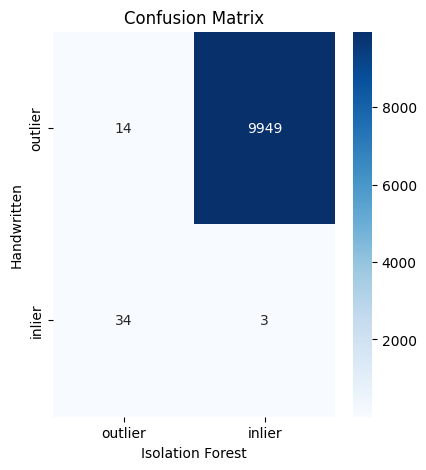

In [101]:
# Plot confusion matrix
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["outlier","inlier"], yticklabels=["outlier","inlier"])
plt.title("Confusion Matrix")
plt.xlabel("Isolation Forest")
plt.ylabel("Handwritten")

In [102]:
#Both agree it is inlier
all_inlier = df2[(df2['is_inlier_IF'] == 1) & (df2['is_inlier_HW'] == 1)] 
all_inlier.to_csv("all_inlier.csv")

In [103]:
#Both agree it is outlier
all_outlier = df2[(df2['is_inlier_IF'] == -1) & (df2['is_inlier_HW'] == -1)] 
all_outlier.to_csv("all_outlier.csv")